In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("tips (data for regression problem).csv")

In [5]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1000x600 with 0 Axes>

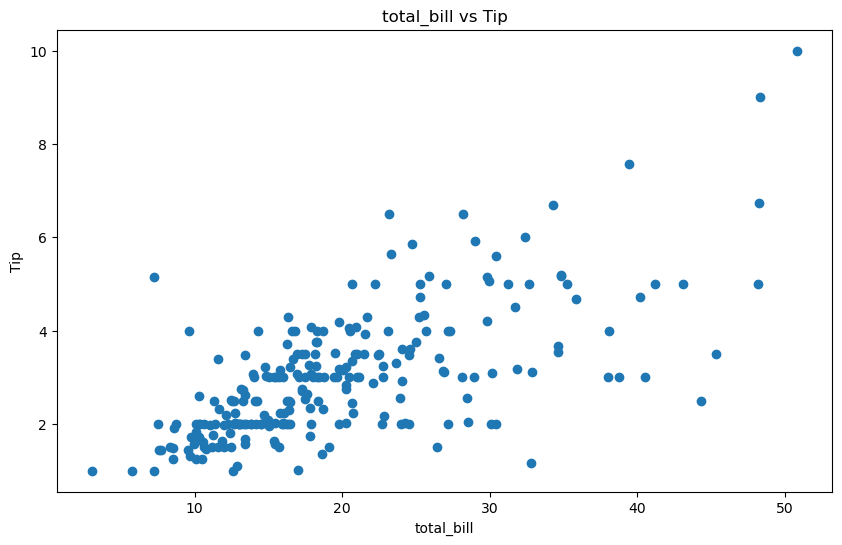

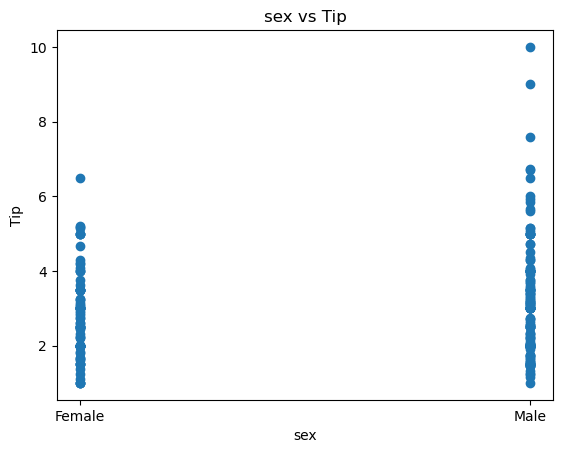

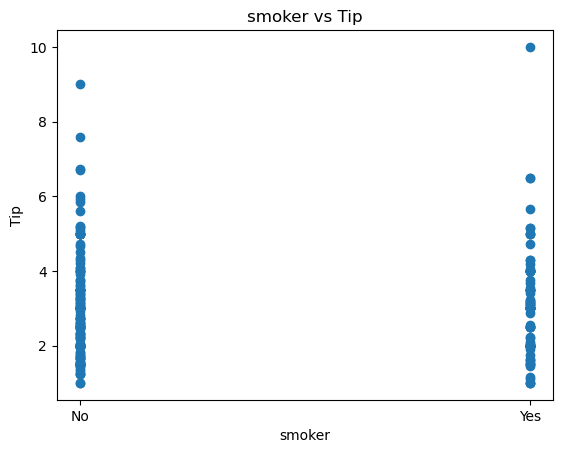

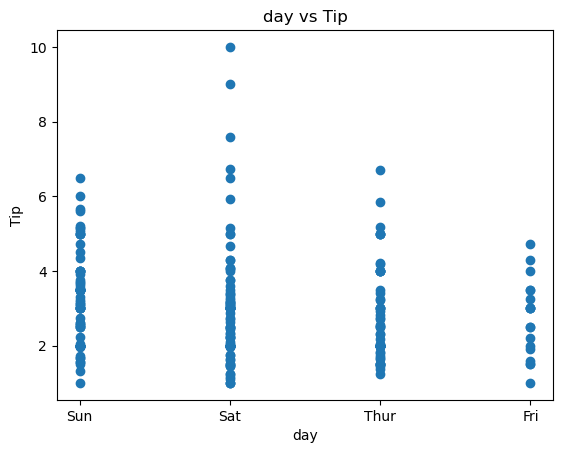

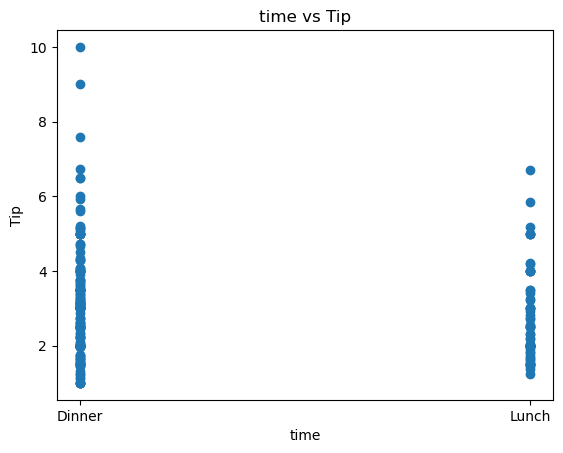

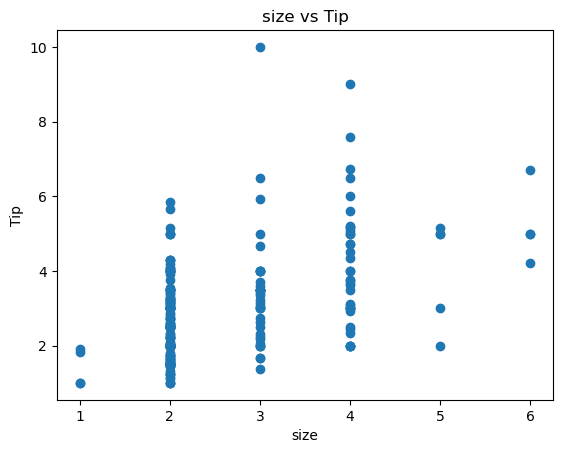

In [9]:
df1 = df.drop(columns=['tip'])
df2 = df['tip']

plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df1.iloc[:,i], df2)
    plt.xlabel(df1.columns[i])
    plt.ylabel('Tip')
    plt.title(df1.columns[i] + ' vs Tip')
    plt.show()

##### Higher the bill, higher the tip value 
##### Men give more tip as compared to women.
##### Non smoker ,smoker tips equally.
##### On saturday,highest tips variance is seen.
##### The highest amount of tips are received on the Sunday.
##### Duing dinner time more tips are given as compared to lunch time.

<Axes: >

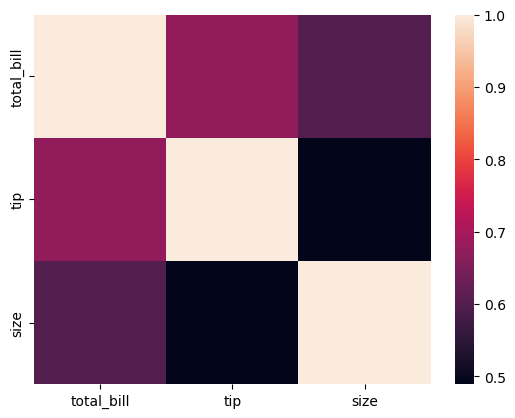

In [11]:
df_corr = df[['total_bill', 'tip', 'size']]
corr = df_corr.corr()
sns.heatmap(corr)

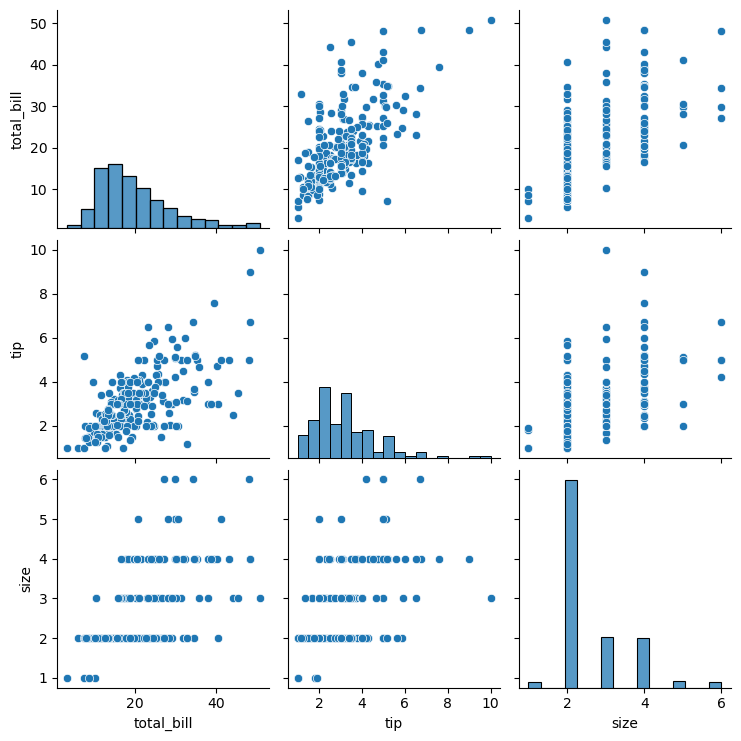

In [10]:
sns.pairplot(df)

In [13]:
label_encoder = LabelEncoder()
df1['sex'] = label_encoder.fit_transform(df['sex'])
df1['smoker'] = label_encoder.fit_transform(df['smoker'])
df1['day'] = label_encoder.fit_transform(df['day'])
df1['time'] = label_encoder.fit_transform(df['time'])

In [15]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.8 MB 9.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 11.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 12.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df1
X = sm.add_constant(X)
y = df2

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [17]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


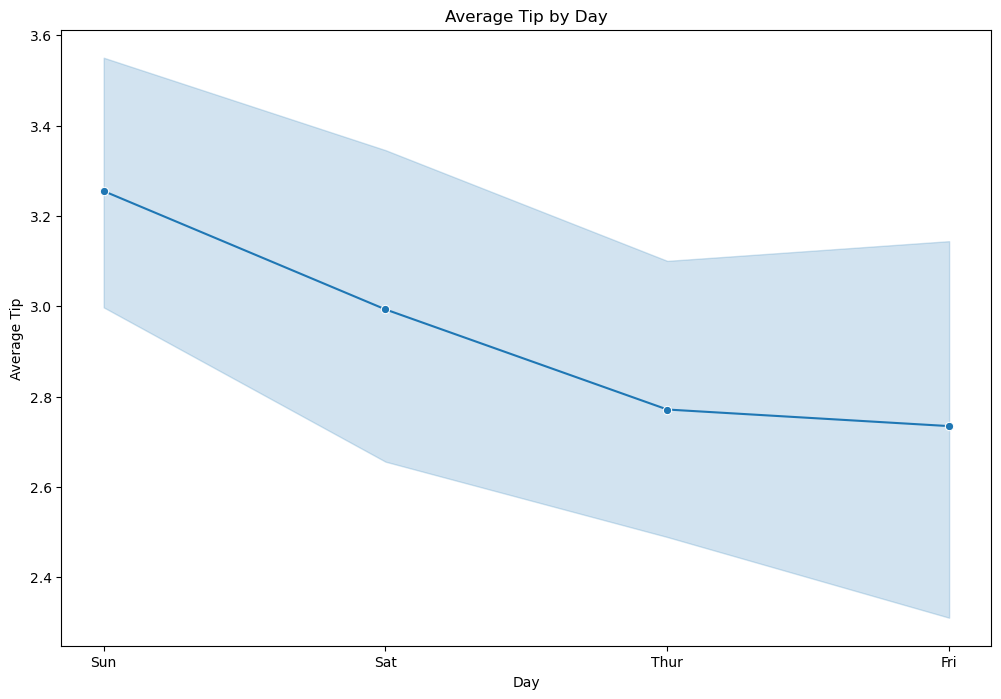

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [27]:
tips_data=pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X=tips_data.drop(["tip"],axis=1)
y=tips_data["tip"]

In [32]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

In [39]:
linear_reg =LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred_linear_reg=linear_reg.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_linear_reg)
r2_lr = r2_score(y_test, y_pred_linear_reg)
print("Linear Regression :\nMSE:", mse_lr, "\nR2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))

Linear Regression :
MSE: 0.7033566017436103 
R2: 0.43730181943482516 
RMSE: 0.8386635807900629


## Lasso Regression

In [40]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression :\nMSE:", mse_lasso, "\nR2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression :
MSE: 0.5908528649971524 
R2: 0.5273068720881755 
RMSE: 0.768669542129225


## Ridge Regression

In [48]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression :\nMSE:", mse_ridge, "\nR2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression :
MSE: 0.7030754649160452 
R2: 0.43752673405277076 
RMSE: 0.8384959540248511


## Decision Trees

In [42]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Model Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree :\nMSE:", mse_tree, "\nR2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree :
MSE: 1.2551938775510205 
R2: -0.004178121600921791 
RMSE: 1.120354353564541


## Random Forests

In [43]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Model Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest :\nMSE:", mse_forest, "\nR2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))

Random Forest :
MSE: 0.9196720148979602 
R2: 0.2642455218065466 
RMSE: 0.9589953153680993


## Support Vector Regression

In [44]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Model Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression :\nMSE:", mse_svr, "\nR2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression :
MSE: 0.6524534436627769 
R2: 0.47802527943520123 
RMSE: 0.8077459029068342


## KNN Regression

In [46]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Model Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors :\nMSE:", mse_knn, "\nR2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))

K-Nearest Neighbors :
MSE: 0.8763725714285714 
R2: 0.29888587066985495 
RMSE: 0.9361477294896203


#### In all these model Lasso Regression is the best model as it has the highest R2 score and lowest MSE.

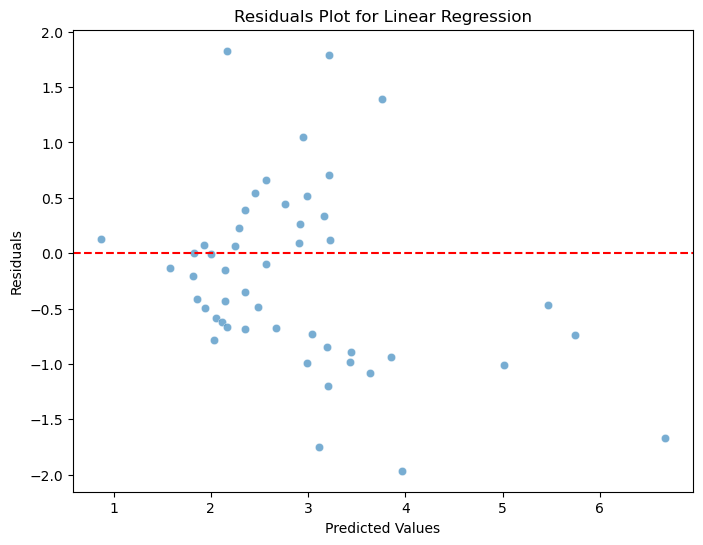

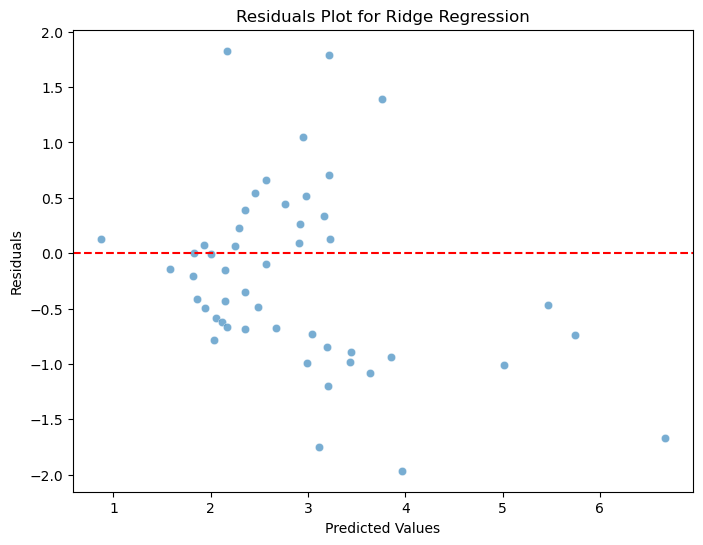

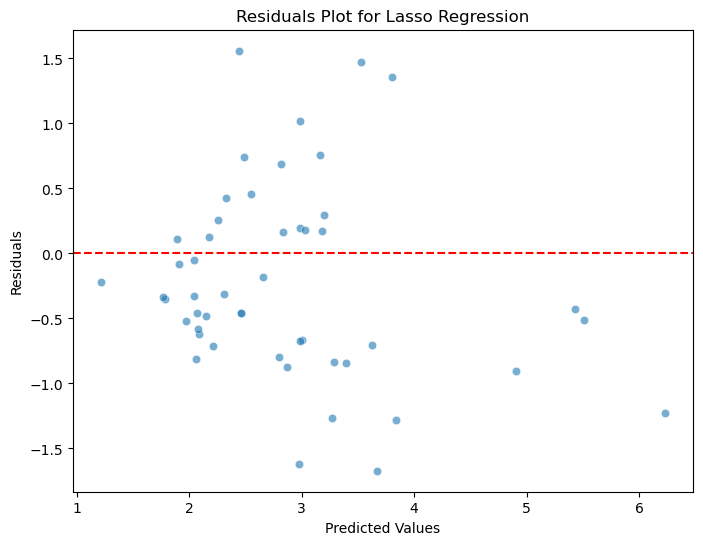

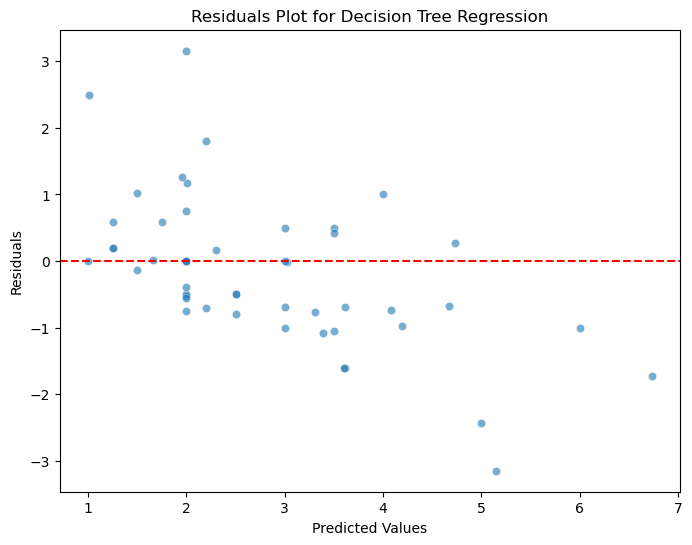

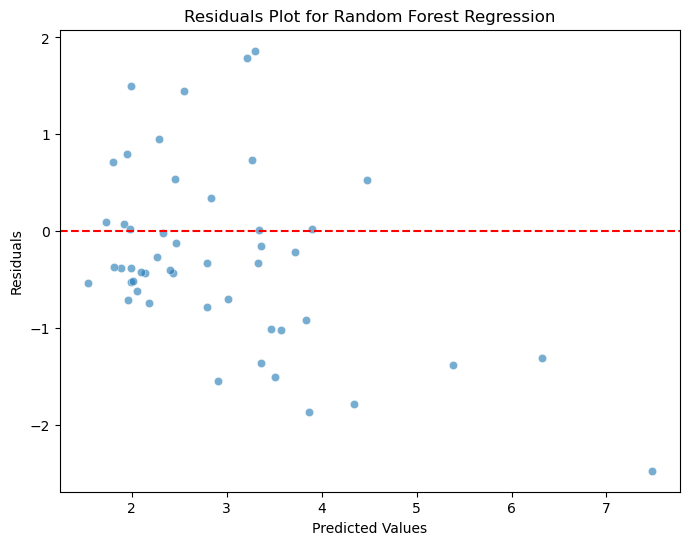

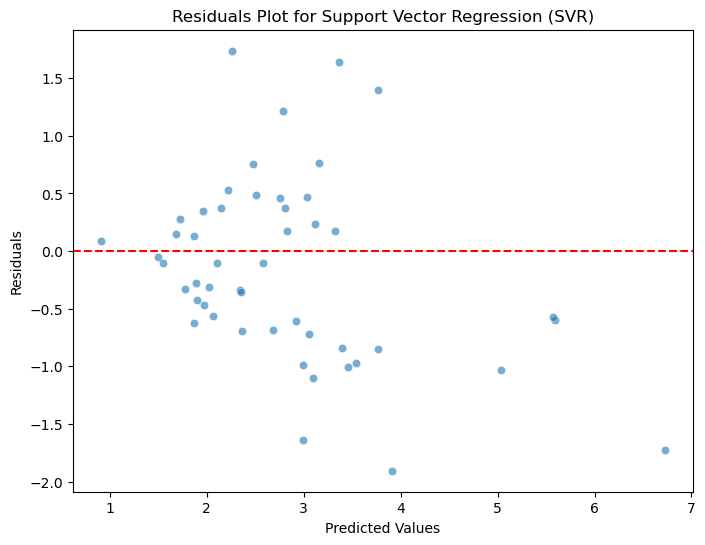

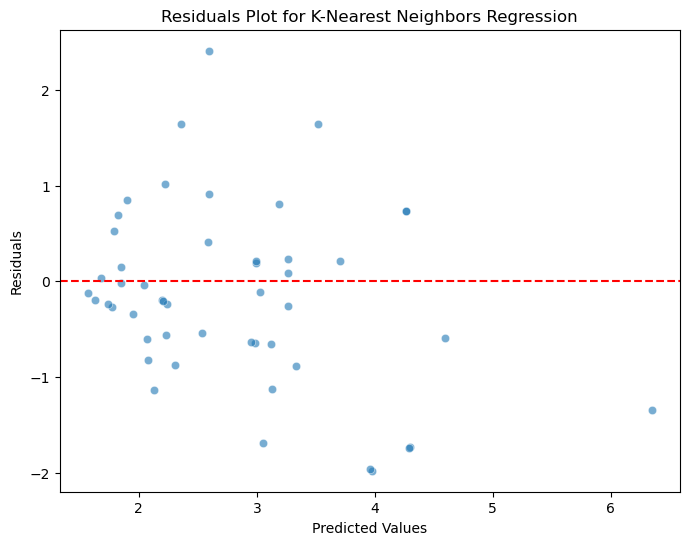

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_linear_reg = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_linear_reg, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

##### 1. The business owners  should focus on the dinner time as people tend to give more tip at that time. 
##### 2.They should also focus on higher number of people on a table as they as well tend to give more tip.
##### 3. They should focus on improving their servies and qualities on Fridays and provide best services on Sundays.
##### 4. Total bill also has a high correlation with tip amount, so they should focus on it as well.